In [1]:
import pandas as pd
import geopandas as gd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/whythawk/data-wrangling-and-validation/master/data/lesson-programmatic/patient-data-anonymisation-exercise.csv")
df.head()

,PATIENT_ID,START,STOP,ENCOUNTERCLASS,DESCRIPTION,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONDESCRIPTION,BIRTHDATE,DEATHDATE,...,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
0,034e9e3b-2def-4559-bb2a-7850888ae060,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
1,034e9e3b-2def-4559-bb2a-7850888ae060,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
2,034e9e3b-2def-4559-bb2a-7850888ae060,2015-01-26T17:45:28Z,2015-01-26T18:15:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
3,034e9e3b-2def-4559-bb2a-7850888ae060,2016-12-29T17:45:28Z,2016-12-29T18:00:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531
4,034e9e3b-2def-4559-bb2a-7850888ae060,2017-01-09T17:45:28Z,2017-01-09T18:00:28Z,outpatient,Encounter for check up (procedure),129.16,54.16,NaN,14/11/1983,NaN,...,nonhispanic,M,Danvers Massachusetts US,422 Farrell Path Unit 69,Somerville,Massachusetts,Middlesex County,2143.0,42.360697,-71.126531


In [2]:
df[df["PATIENT_ID"] == "71ba0469-f0cc-4177-ac70-ea07cb01c8b8"]

,PATIENT_ID,START,STOP,ENCOUNTERCLASS,DESCRIPTION,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONDESCRIPTION,BIRTHDATE,DEATHDATE,...,ETHNICITY,GENDER,BIRTHPLACE,ADDRESS,CITY,STATE,COUNTY,ZIP,LAT,LON
703,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2002-01-15T20:46:46Z,2002-01-15T21:01:46Z,ambulatory,Encounter for problem,129.16,54.16,NaN,21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
704,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2002-01-25T20:46:46Z,2002-01-25T21:37:46Z,ambulatory,Encounter for problem,129.16,54.16,NaN,21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
705,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2002-11-28T20:46:46Z,2002-12-12T20:46:46Z,ambulatory,Encounter for symptom,129.16,54.16,Perennial allergic rhinitis with seasonal vari...,21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
706,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2003-04-29T20:46:46Z,2003-04-29T21:01:46Z,wellness,Well child visit (procedure),129.16,54.16,NaN,21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
707,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2003-05-11T20:46:46Z,2003-05-11T21:01:46Z,ambulatory,Encounter for symptom,129.16,54.16,Streptococcal sore throat (disorder),21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2012-05-08T20:46:46Z,2012-05-08T21:01:46Z,ambulatory,Postoperative follow-up visit (procedure),129.16,54.16,Malignant neoplasm of breast (disorder),21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
784,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2012-05-08T20:46:46Z,2012-05-09T21:07:46Z,inpatient,Screening surveillance (regime/therapy),129.16,54.16,Malignant neoplasm of breast (disorder),21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
785,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2012-05-08T20:46:46Z,2012-05-09T21:16:46Z,inpatient,Gynecology service (qualifier value),129.16,54.16,Malignant neoplasm of breast (disorder),21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724
786,71ba0469-f0cc-4177-ac70-ea07cb01c8b8,2012-08-14T20:46:46Z,2012-08-14T21:01:46Z,ambulatory,Postoperative follow-up visit (procedure),129.16,54.16,Malignant neoplasm of breast (disorder),21/11/2000,21/11/2012,...,nonhispanic,F,Lee Massachusetts US,1025 Collier Arcade,Ashland,Massachusetts,Middlesex County,NaN,42.291986,-71.463724


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53346 entries, 0 to 53345
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PATIENT_ID         53346 non-null  object 
 1   START              53346 non-null  object 
 2   STOP               53346 non-null  object 
 3   ENCOUNTERCLASS     53346 non-null  object 
 4   DESCRIPTION        53346 non-null  object 
 5   TOTAL_CLAIM_COST   53346 non-null  float64
 6   PAYER_COVERAGE     53346 non-null  float64
 7   REASONDESCRIPTION  13777 non-null  object 
 8   BIRTHDATE          53346 non-null  object 
 9   DEATHDATE          14287 non-null  object 
 10  SSN                53346 non-null  object 
 11  DRIVERS            49285 non-null  object 
 12  PASSPORT           46965 non-null  object 
 13  FIRST              53346 non-null  object 
 14  LAST               53346 non-null  object 
 15  MAIDEN             16597 non-null  object 
 16  MARITAL            436

In [4]:
gdf = gd.GeoDataFrame(df, crs="EPSG:4326", geometry=gd.points_from_xy(df.LON, df.LAT))

C:\Users\hp\ANACONDA\envs\datascience\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


ConnectionError: HTTPSConnectionPool(host='stamen-tiles-a.a.ssl.fastly.net', port=443): Max retries exceeded with url: /terrain/12/1211/1505.png (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000021BF4CA3B88>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

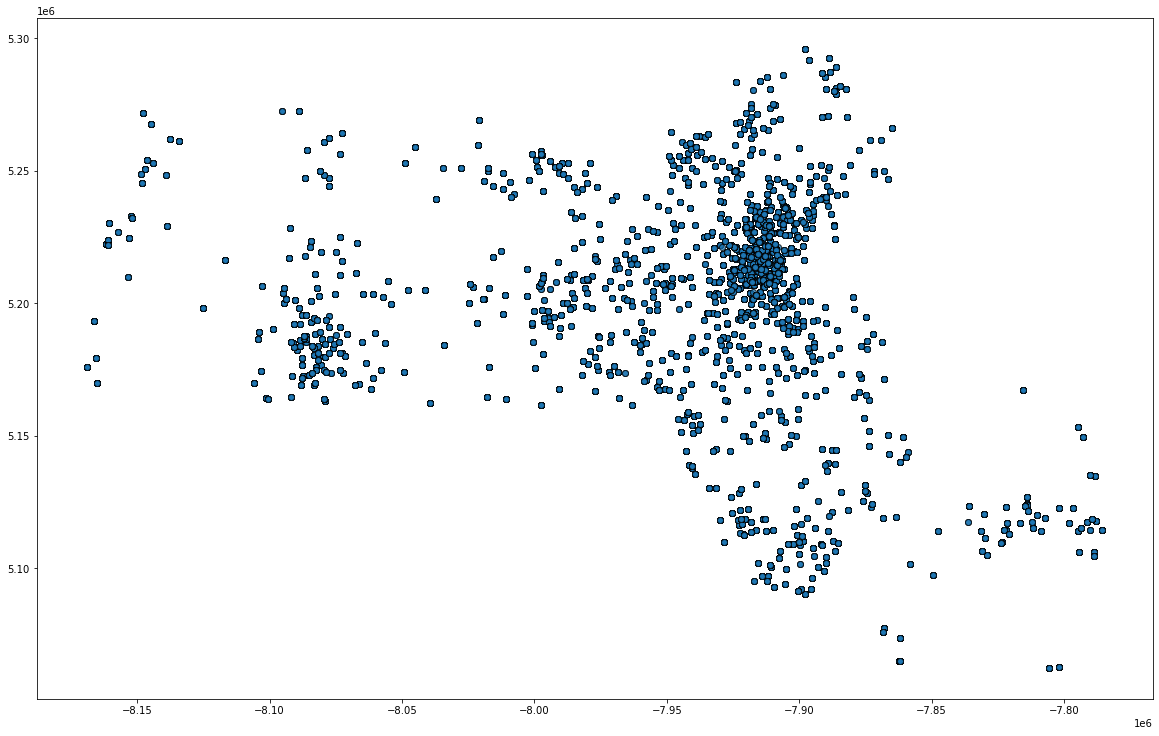

In [5]:
import contextily as ctx

# reproject
gdf = gdf.to_crs(epsg=3857)
ax = gdf.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.TonerLite, zoom=12)
ax.set_axis_off()

In [6]:
# Préciser les colonnes pour l'éloignement
suppression = ["SSN", "DRIVERS", "PASSPORT", "FIRST", "LAST", "MAIDEN", "ADDRESS", "ZIP"]
# Et les laisser tomber
df.drop(suppression, axis=1, inplace=True)

In [7]:
import uuid
str(uuid.uuid4())

'cd32784f-1ff8-4ed0-83d9-53424cc2015e'

In [8]:
import numpy as np
sigma = 0.001 
mu = 1
np.random.normal(mu, sigma)

1.0009746018323065

In [9]:
from collections import defaultdict

class Pseudonymise:
    
    def __init__(self, sigma=0.001):
        # Initialiser un dictionnaire par défaut, cela crée un élément de dictionnaire par défaut s'il n'existe pas
        # Nous utilisons cette méthode pour garantir l'intégrité des données tout en les rendant aléatoires
        # http://ikigomu.com/?p=28
        self.sigma = sigma
        self.mu = 0 # Nous voulons nous écarter de la vérité
        # Pseudo-patient dict
        self.pp = defaultdict(lambda: {"uuid":str(uuid.uuid4()),
                                       "lat": np.random.normal(self.mu, self.sigma),
                                       "lon": np.random.normal(self.mu, self.sigma)
                                      })
        
    def create_data(self, identities):
        """
        Pour chaque identité unique produire un UUID unique, et un gaussien randomisé "LAT" et "LON".

        Parameters
        ----------
        identities: liste des chaînes de caractères

        Returns
        -------
        dict
            Chaque entrée de dict contient un enregistrement contenant un "uuid" et un modificateur pour "lat" et "lon".
        """
        for _id in identities:
            self.pp[_id]
        return self.pp
    
    def redact(self, row):
        """
        Pour une ligne donnée dans un dataframe, retournez la version pseudonymisée de "PATIENT_ID", "LAT", "LON".
        
        Parameters:
        row : Ligne de la trame de données
        
        row:
        DataFrame tranche de ligne 
        """
        return [
            self.pp[row["PATIENT_ID"]]["uuid"],
            row["LAT"] + self.pp[row["PATIENT_ID"]]["lat"],
            row["LON"] + self.pp[row["PATIENT_ID"]]["lon"],
        ]

p = Pseudonymise()
pp_data = p.create_data(df["PATIENT_ID"])
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
fields = ["PATIENT_ID", "LAT", "LON"]
df[fields] = df[fields].apply(p.redact, axis=1, result_type="expand")

C:\Users\hp\ANACONDA\envs\datascience\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


ConnectionError: HTTPSConnectionPool(host='stamen-tiles-a.a.ssl.fastly.net', port=443): Max retries exceeded with url: /terrain/12/1211/1505.png (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x0000021BF290F348>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

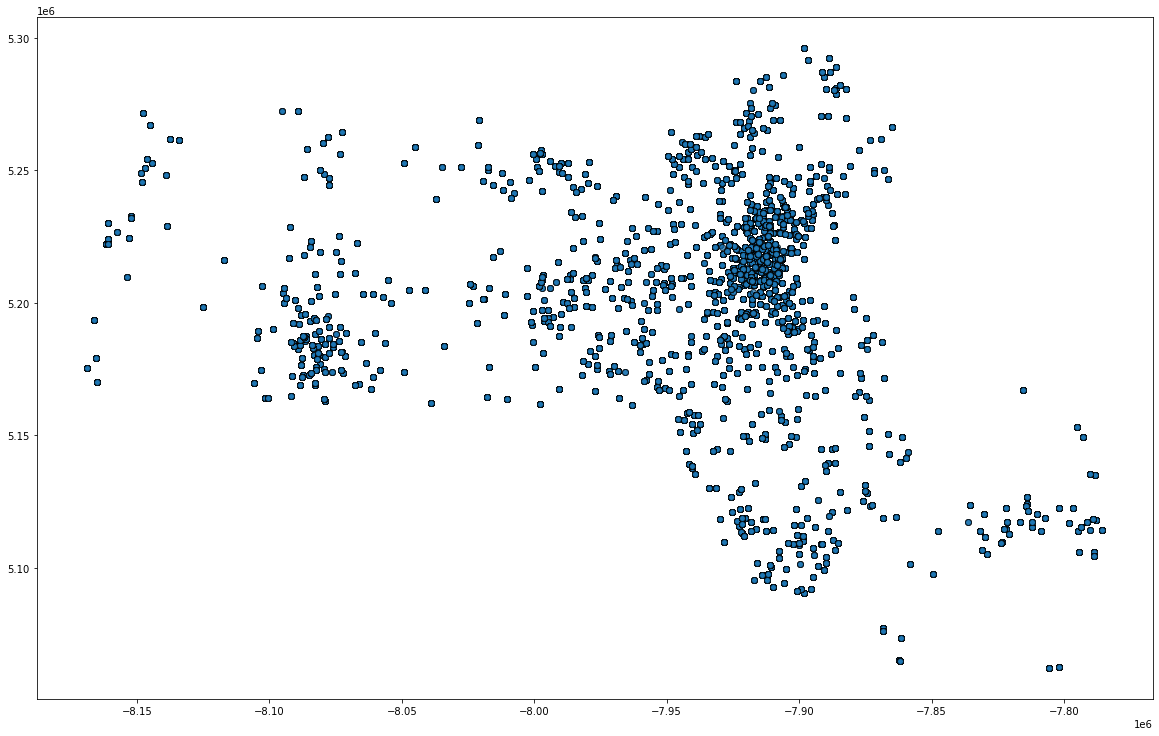

In [10]:
gdf = gd.GeoDataFrame(df, crs="EPSG:4326", geometry=gd.points_from_xy(df.LON, df.LAT))
gdf = gdf.to_crs(epsg=3857)
ax = gdf.plot(figsize=(20, 20), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.TonerLite, zoom=12)
ax.set_axis_off()

In [11]:
#Anonymisation BIRTHDATE
from pandas.tseries.offsets import MonthEnd
from pandas.tseries.offsets import MonthBegin
df['BIRTHDATE_BEGIN']=pd.to_datetime(df['BIRTHDATE'], infer_datetime_format=True) + MonthBegin(0)
df['BIRTHDATE_END']=pd.to_datetime(df['BIRTHDATE'], infer_datetime_format=True) + MonthEnd(1)
df['BIRTHDATE_INTERVAL']=df['BIRTHDATE_BEGIN'].astype(str) +'---'+df['BIRTHDATE_END'].astype(str)
df.drop(['BIRTHDATE_BEGIN','BIRTHDATE_END','BIRTHDATE'], axis=1, inplace=True)
df.head()

,PATIENT_ID,START,STOP,ENCOUNTERCLASS,DESCRIPTION,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONDESCRIPTION,DEATHDATE,MARITAL,...,ETHNICITY,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,LAT,LON,geometry,BIRTHDATE_INTERVAL
0,aeae2d8c-82dc-4039-9927-7033eb754602,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),NaN,M,...,nonhispanic,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.361755,-71.126409,POINT (-71.12641 42.36175),1983-12-01---1983-11-30
1,aeae2d8c-82dc-4039-9927-7033eb754602,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,NaN,M,...,nonhispanic,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.361755,-71.126409,POINT (-71.12641 42.36175),1983-12-01---1983-11-30
2,aeae2d8c-82dc-4039-9927-7033eb754602,2015-01-26T17:45:28Z,2015-01-26T18:15:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,NaN,M,...,nonhispanic,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.361755,-71.126409,POINT (-71.12641 42.36175),1983-12-01---1983-11-30
3,aeae2d8c-82dc-4039-9927-7033eb754602,2016-12-29T17:45:28Z,2016-12-29T18:00:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),NaN,M,...,nonhispanic,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.361755,-71.126409,POINT (-71.12641 42.36175),1983-12-01---1983-11-30
4,aeae2d8c-82dc-4039-9927-7033eb754602,2017-01-09T17:45:28Z,2017-01-09T18:00:28Z,outpatient,Encounter for check up (procedure),129.16,54.16,NaN,NaN,M,...,nonhispanic,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.361755,-71.126409,POINT (-71.12641 42.36175),1983-12-01---1983-11-30


In [12]:
#Anonymisation DEATHDATE
from pandas.tseries.offsets import MonthEnd
from pandas.tseries.offsets import MonthBegin
df['DEATHDATE_BEGIN']=pd.to_datetime(df['DEATHDATE'], infer_datetime_format=True) + MonthBegin(0)
df['DEATHDATE_END']=pd.to_datetime(df['DEATHDATE'], infer_datetime_format=True) + MonthEnd(1)
df['DEATHDATE_INTERVAL']=df['DEATHDATE_BEGIN'].astype(str) +'---'+df['DEATHDATE_END'].astype(str)
df.drop(['DEATHDATE_BEGIN','DEATHDATE_END','DEATHDATE'], axis=1, inplace=True)
df.head()

,PATIENT_ID,START,STOP,ENCOUNTERCLASS,DESCRIPTION,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONDESCRIPTION,MARITAL,RACE,...,GENDER,BIRTHPLACE,CITY,STATE,COUNTY,LAT,LON,geometry,BIRTHDATE_INTERVAL,DEATHDATE_INTERVAL
0,aeae2d8c-82dc-4039-9927-7033eb754602,2010-01-23T17:45:28Z,2010-01-23T18:10:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),M,white,...,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.361755,-71.126409,POINT (-71.12641 42.36175),1983-12-01---1983-11-30,NaT---NaT
1,aeae2d8c-82dc-4039-9927-7033eb754602,2012-01-23T17:45:28Z,2012-01-23T18:00:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,M,white,...,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.361755,-71.126409,POINT (-71.12641 42.36175),1983-12-01---1983-11-30,NaT---NaT
2,aeae2d8c-82dc-4039-9927-7033eb754602,2015-01-26T17:45:28Z,2015-01-26T18:15:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,M,white,...,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.361755,-71.126409,POINT (-71.12641 42.36175),1983-12-01---1983-11-30,NaT---NaT
3,aeae2d8c-82dc-4039-9927-7033eb754602,2016-12-29T17:45:28Z,2016-12-29T18:00:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),M,white,...,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.361755,-71.126409,POINT (-71.12641 42.36175),1983-12-01---1983-11-30,NaT---NaT
4,aeae2d8c-82dc-4039-9927-7033eb754602,2017-01-09T17:45:28Z,2017-01-09T18:00:28Z,outpatient,Encounter for check up (procedure),129.16,54.16,NaN,M,white,...,M,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.361755,-71.126409,POINT (-71.12641 42.36175),1983-12-01---1983-11-30,NaT---NaT


In [13]:
#Anonymisation START
from pandas.tseries.offsets import MonthEnd
from pandas.tseries.offsets import MonthBegin
df['START_BEGIN']=pd.to_datetime(df['START'], infer_datetime_format=True) + MonthBegin(0)
df['START_END']=pd.to_datetime(df['START'], infer_datetime_format=True) + MonthEnd(1)
df['START_INTERVAL']=df['START_BEGIN'].astype(str) +'---'+df['START_END'].astype(str)
df.drop(['START_BEGIN','START_END','START'], axis=1, inplace=True)
df.head()

,PATIENT_ID,STOP,ENCOUNTERCLASS,DESCRIPTION,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONDESCRIPTION,MARITAL,RACE,ETHNICITY,...,BIRTHPLACE,CITY,STATE,COUNTY,LAT,LON,geometry,BIRTHDATE_INTERVAL,DEATHDATE_INTERVAL,START_INTERVAL
0,aeae2d8c-82dc-4039-9927-7033eb754602,2010-01-23T18:10:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),M,white,nonhispanic,...,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.361755,-71.126409,POINT (-71.12641 42.36175),1983-12-01---1983-11-30,NaT---NaT,2010-02-01 17:45:28---2010-01-31 17:45:28
1,aeae2d8c-82dc-4039-9927-7033eb754602,2012-01-23T18:00:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,M,white,nonhispanic,...,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.361755,-71.126409,POINT (-71.12641 42.36175),1983-12-01---1983-11-30,NaT---NaT,2012-02-01 17:45:28---2012-01-31 17:45:28
2,aeae2d8c-82dc-4039-9927-7033eb754602,2015-01-26T18:15:28Z,wellness,General examination of patient (procedure),129.16,129.16,NaN,M,white,nonhispanic,...,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.361755,-71.126409,POINT (-71.12641 42.36175),1983-12-01---1983-11-30,NaT---NaT,2015-02-01 17:45:28---2015-01-31 17:45:28
3,aeae2d8c-82dc-4039-9927-7033eb754602,2016-12-29T18:00:28Z,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),M,white,nonhispanic,...,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.361755,-71.126409,POINT (-71.12641 42.36175),1983-12-01---1983-11-30,NaT---NaT,2017-01-01 17:45:28---2016-12-31 17:45:28
4,aeae2d8c-82dc-4039-9927-7033eb754602,2017-01-09T18:00:28Z,outpatient,Encounter for check up (procedure),129.16,54.16,NaN,M,white,nonhispanic,...,Danvers Massachusetts US,Somerville,Massachusetts,Middlesex County,42.361755,-71.126409,POINT (-71.12641 42.36175),1983-12-01---1983-11-30,NaT---NaT,2017-02-01 17:45:28---2017-01-31 17:45:28


In [14]:
#Anonymisation STOP
from pandas.tseries.offsets import MonthEnd
from pandas.tseries.offsets import MonthBegin
df['STOP_BEGIN']=pd.to_datetime(df['STOP'], infer_datetime_format=True) + MonthBegin(0)
df['STOP_END']=pd.to_datetime(df['STOP'], infer_datetime_format=True) + MonthEnd(1)
df['STOP_INTERVAL']=df['STOP_BEGIN'].astype(str) +'---'+df['STOP_END'].astype(str)
df.drop(['STOP_BEGIN','STOP_END','STOP'], axis=1, inplace=True)
df.head()

,PATIENT_ID,ENCOUNTERCLASS,DESCRIPTION,TOTAL_CLAIM_COST,PAYER_COVERAGE,REASONDESCRIPTION,MARITAL,RACE,ETHNICITY,GENDER,...,CITY,STATE,COUNTY,LAT,LON,geometry,BIRTHDATE_INTERVAL,DEATHDATE_INTERVAL,START_INTERVAL,STOP_INTERVAL
0,aeae2d8c-82dc-4039-9927-7033eb754602,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),M,white,nonhispanic,M,...,Somerville,Massachusetts,Middlesex County,42.361755,-71.126409,POINT (-71.12641 42.36175),1983-12-01---1983-11-30,NaT---NaT,2010-02-01 17:45:28---2010-01-31 17:45:28,2010-02-01 18:10:28---2010-01-31 18:10:28
1,aeae2d8c-82dc-4039-9927-7033eb754602,wellness,General examination of patient (procedure),129.16,129.16,NaN,M,white,nonhispanic,M,...,Somerville,Massachusetts,Middlesex County,42.361755,-71.126409,POINT (-71.12641 42.36175),1983-12-01---1983-11-30,NaT---NaT,2012-02-01 17:45:28---2012-01-31 17:45:28,2012-02-01 18:00:28---2012-01-31 18:00:28
2,aeae2d8c-82dc-4039-9927-7033eb754602,wellness,General examination of patient (procedure),129.16,129.16,NaN,M,white,nonhispanic,M,...,Somerville,Massachusetts,Middlesex County,42.361755,-71.126409,POINT (-71.12641 42.36175),1983-12-01---1983-11-30,NaT---NaT,2015-02-01 17:45:28---2015-01-31 17:45:28,2015-02-01 18:15:28---2015-01-31 18:15:28
3,aeae2d8c-82dc-4039-9927-7033eb754602,ambulatory,Encounter for symptom,129.16,54.16,Acute bronchitis (disorder),M,white,nonhispanic,M,...,Somerville,Massachusetts,Middlesex County,42.361755,-71.126409,POINT (-71.12641 42.36175),1983-12-01---1983-11-30,NaT---NaT,2017-01-01 17:45:28---2016-12-31 17:45:28,2017-01-01 18:00:28---2016-12-31 18:00:28
4,aeae2d8c-82dc-4039-9927-7033eb754602,outpatient,Encounter for check up (procedure),129.16,54.16,NaN,M,white,nonhispanic,M,...,Somerville,Massachusetts,Middlesex County,42.361755,-71.126409,POINT (-71.12641 42.36175),1983-12-01---1983-11-30,NaT---NaT,2017-02-01 17:45:28---2017-01-31 17:45:28,2017-02-01 18:00:28---2017-01-31 18:00:28


In [15]:
df2 = pd.read_csv("https://raw.githubusercontent.com/whythawk/data-wrangling-and-validation/master/data/lesson-programmatic/patient-data-anonymisation-exercise.csv")

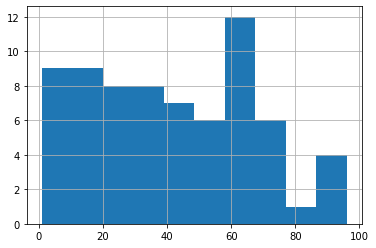

In [16]:
# Convertir les champs de date en dates de pandas
for c in ["START", "STOP", "BIRTHDATE", "DEATHDATE"]:
    df2[c] = df2[c].apply(lambda x: pd.to_datetime(x, errors="coerce", dayfirst=True).date())
# Filtre pour le traitement médical final pour tous les patients décédés
df2 = df2[df2.STOP==df2.DEATHDATE]
df2.sort_values(by="STOP", inplace=True)
df2.drop_duplicates(subset="PATIENT_ID", keep="last", inplace=True)
# Créer le DEATHAGE 
# Il s'agit d'un calcul TRÈS approximatif de l'âge au décès
df2["DEATHAGE"] = df2.DEATHDATE.apply(lambda x: x.year) - df2.BIRTHDATE.apply(lambda x: x.year)
# Et tirez la répartition des décès, divisée en n bacs
df2["DEATHAGE"].hist(bins=10)

In [17]:
df2["DEATHAGE"].unique()

array([13,  4, 17, 10, 25, 26,  7, 47, 19, 49, 15, 62,  1, 35, 61, 36, 46,
       76, 33, 16, 48, 52, 65, 34,  5, 77, 28, 54, 41, 53, 59, 37, 56, 93,
       11, 68, 43, 96, 67,  2, 90, 22, 91, 75, 60, 38, 69, 55, 73, 20, 63,
       71], dtype=int64)

In [18]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df2['NBRE_DE_PATIENTS']=df2['DEATHAGE']
df3 = pd.cut(df2['NBRE_DE_PATIENTS'], bins=bins).value_counts().sort_index()
df3=df3.to_frame()
df3

,NBRE_DE_PATIENTS
"(0, 10]",9
"(10, 20]",11
"(20, 30]",6
"(30, 40]",8
"(40, 50]",8
"(50, 60]",9
"(60, 70]",10
"(70, 80]",5
"(80, 90]",1
"(90, 100]",3


In [19]:
df2["DESCRIPTION"].unique()

array(['Death Certification', 'Cardiac Arrest',
       'General examination of patient (procedure)', 'Stroke',
       'Myocardial Infarction', 'Emergency room admission (procedure)',
       'Encounter for check up (procedure)', 'Emergency Room Admission',
       'Inpatient stay (finding)', 'Encounter for problem (procedure)',
       'Follow-up encounter'], dtype=object)

In [20]:
#Raison visite
def decompte(raison_visite):
    n=[len(df2[(df2.DESCRIPTION==raison_visite) & (df2.DEATHAGE>=0) & ((df2.DEATHAGE<10))]),
       len(df2[(df2.DESCRIPTION==raison_visite) & (df2.DEATHAGE>=10) & ((df2.DEATHAGE<20))]), 
       len(df2[(df2.DESCRIPTION==raison_visite) & (df2.DEATHAGE>=20) & ((df2.DEATHAGE<30))]),
       len(df2[(df2.DESCRIPTION==raison_visite) & (df2.DEATHAGE>=30) & ((df2.DEATHAGE<40))]),
       len(df2[(df2.DESCRIPTION==raison_visite) & (df2.DEATHAGE>=40) & ((df2.DEATHAGE<50))]),
       len(df2[(df2.DESCRIPTION==raison_visite) & (df2.DEATHAGE>=50) & ((df2.DEATHAGE<60))]),
       len(df2[(df2.DESCRIPTION==raison_visite) & (df2.DEATHAGE>=60) & ((df2.DEATHAGE<70))]),
       len(df2[(df2.DESCRIPTION==raison_visite) & (df2.DEATHAGE>=70) & ((df2.DEATHAGE<80))]),
       len(df2[(df2.DESCRIPTION==raison_visite) & (df2.DEATHAGE>=80) & ((df2.DEATHAGE<90))]),
       len(df2[(df2.DESCRIPTION==raison_visite) & (df2.DEATHAGE>=90) & ((df2.DEATHAGE<100))])      
      ]
    return n

In [21]:
Death_Certification=decompte('Death Certification')
Cardiac_Arrest=decompte('Cardiac Arrest')
General_examination=decompte('General examination of patient (procedure)')
Stroke=decompte('Stroke')
Myocardial_Infarction=decompte('Myocardial Infarction')
Emergency_procedure=decompte('Emergency room admission (procedure)')
Encounter=decompte('Encounter for problem (procedure)')
Followup_encounter=decompte('Follow-up encounter')

In [22]:
df3['Death_Certification']=Death_Certification
df3['Cardiac_Arrest']=Cardiac_Arrest
df3['General examination of patient (procedure)']=General_examination
df3['Stroke']=Stroke
df3['Myocardial Infarction']=Myocardial_Infarction
df3['Emergency room admission (procedure)']=Emergency_procedure
df3['Encounter for problem (procedure)']=Encounter
df3['Follow-up encounter']=Followup_encounter
df3

,NBRE_DE_PATIENTS,Death_Certification,Cardiac_Arrest,General examination of patient (procedure),Stroke,Myocardial Infarction,Emergency room admission (procedure),Encounter for problem (procedure),Follow-up encounter
"(0, 10]",9,7,0,0,0,0,1,0,0
"(10, 20]",11,5,2,0,0,1,1,0,0
"(20, 30]",6,0,1,1,0,2,2,0,0
"(30, 40]",8,0,1,1,0,3,2,0,0
"(40, 50]",8,0,0,2,1,2,3,0,0
"(50, 60]",9,1,1,1,1,0,0,0,0
"(60, 70]",10,2,0,1,1,3,1,0,0
"(70, 80]",5,0,0,0,3,1,0,0,1
"(80, 90]",1,0,0,0,0,0,0,0,0
"(90, 100]",3,0,0,0,2,0,0,1,0
